In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import pandas as pd

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Classification/sign_language_recognition/SignRecognition/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Classification/sign_language_recognition/SignRecognition/sign_mnist_test/sign_mnist_test.csv")
# can download dataset from Kaggle With command API

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Classification/sign_language_recognition/SignRecognition/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


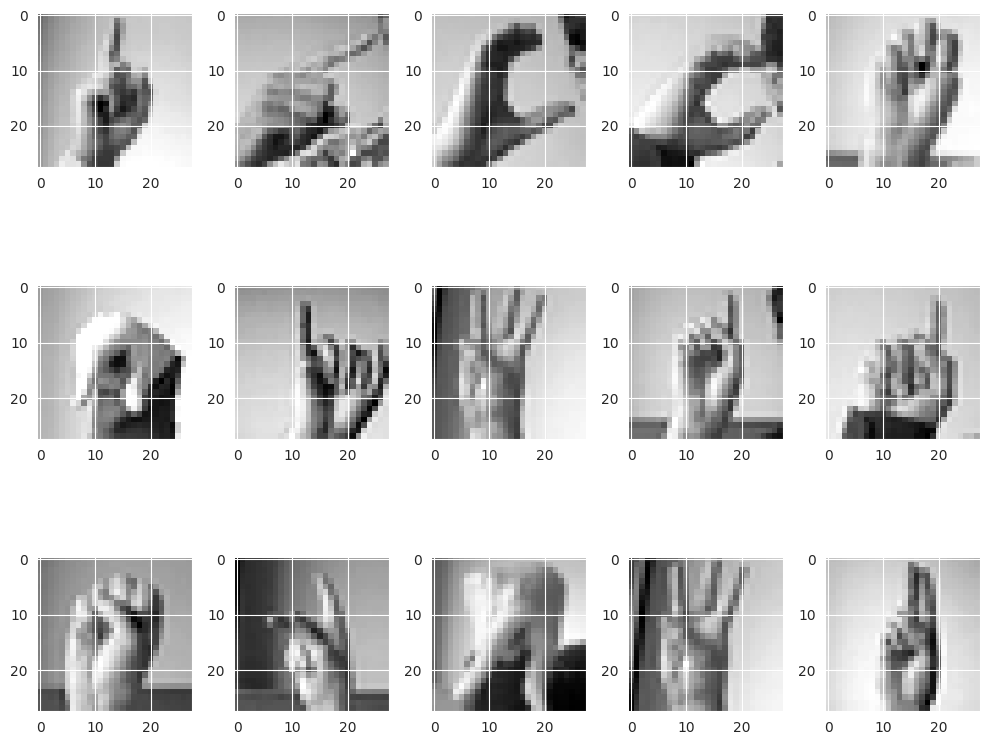

In [ ]:
f, ax = plt.subplots(3,5)
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)


In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 75)        300       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 50)       

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 24 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])


Epoch 1/24
215/215 [==============================] - 122s 561ms/step - loss: 1.0664 - accuracy: 0.6681 - val_loss: 3.9221 - val_accuracy: 0.1511 - lr: 0.0010
Epoch 2/24
215/215 [==============================] - 116s 538ms/step - loss: 0.2232 - accuracy: 0.9254 - val_loss: 1.6220 - val_accuracy: 0.5163 - lr: 0.0010
Epoch 3/24
215/215 [==============================] - 117s 542ms/step - loss: 0.1052 - accuracy: 0.9665 - val_loss: 0.3178 - val_accuracy: 0.8904 - lr: 0.0010
Epoch 4/24
215/215 [==============================] - 112s 523ms/step - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0840 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 5/24
215/215 [==============================] - 109s 507ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0945 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 6/24
215/215 [==============================] - 107s 497ms/step - loss: 0.0419 - accuracy: 0.9854 - val_loss: 0.0210 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 7/24
215/215 [==========================

In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 24ms/step - loss: 0.0011 - accuracy: 0.9997
Accuracy of the model is -  99.9721109867096 %


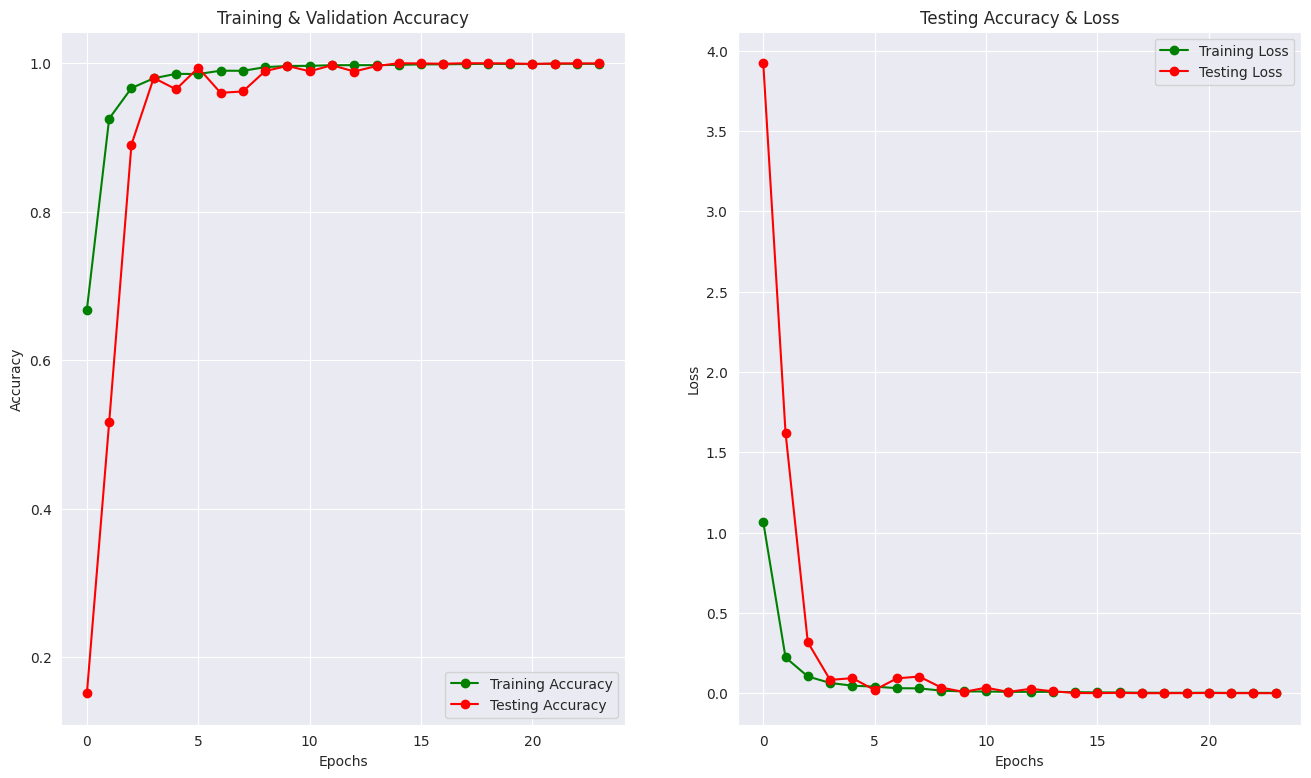

In [ ]:
epochs = [i for i in range(24)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Adjust predictions for classes greater than or equal to 9
predicted_classes = np.where(predicted_classes >= 9, predicted_classes + 1, predicted_classes)

predicted_classes[:5]


225/225 [==============================] - 7s 29ms/step


array([ 6,  5, 10,  0,  3])

In [ ]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Adjust predictions for classes greater than or equal to 9
predicted_classes = np.where(predicted_classes >= 9, predicted_classes + 1, predicted_classes)

# Now you can use classification_report
from sklearn.metrics import classification_report

classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predicted_classes, target_names=classes))


              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      0.99      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [ ]:
cm = confusion_matrix(y, predicted_classes)


In [ ]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
# Convert predicted_classes and y to NumPy arrays
predicted_classes = np.array(predicted_classes)
y = np.array(y)

# Perform element-wise comparison only if lengths match
if len(predicted_classes) == len(y):
    correct = np.nonzero(predicted_classes == y)[0]
    print("Number of correct predictions:", len(correct))
else:
    print("Error: Lengths of predicted_classes and y do not match.")



Number of correct predictions: 7170


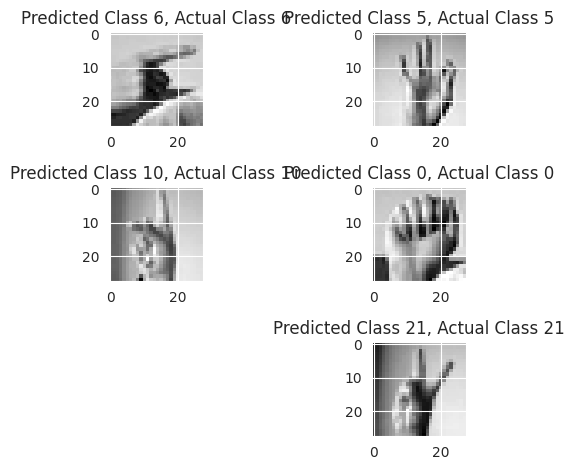

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predicted_classes[c], y[c]))
    plt.tight_layout()
    i += 1


In [ ]:
# model.save('Model_Sign_Language_MNIST.h5')
model.save('/content/drive/MyDrive/Classification/sign_language_recognition/SignRecognition/Model_Sign_Language_MNIST.h5')
